
## MED 3

# Regresja wielomianowa

In [457]:
# Aleksandra Kowalczyk 307414

Wczytanie niezbędnych bibliotek


In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $\w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

<IPython.core.display.Javascript object>


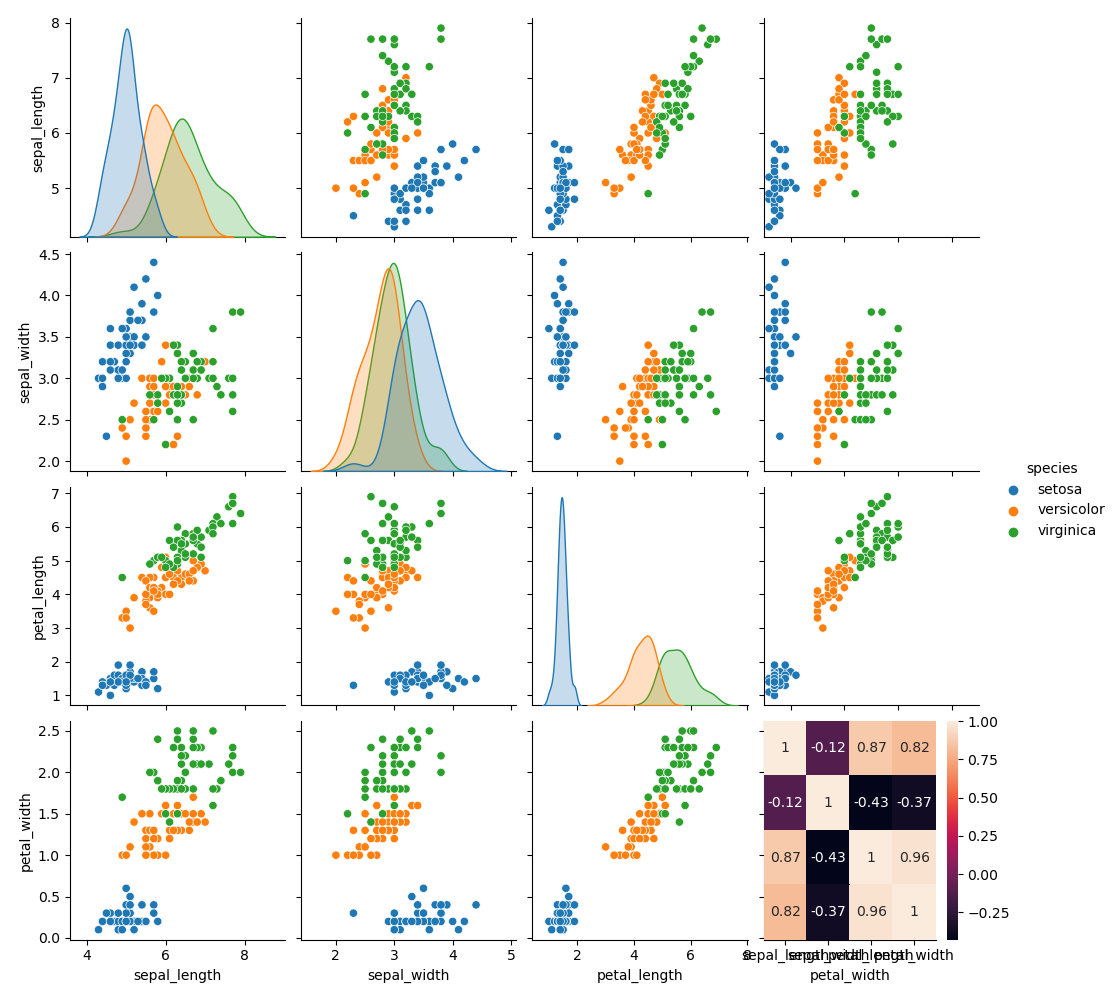

<AxesSubplot:label='73aae083-c090-4f69-ae74-f3e90db0eabe'>

In [2]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
sns.heatmap(iris.corr(),annot = iris.corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

In [446]:
# z macierzy wykresów punktowych możemy wywnioskować że najbardziej skorelowane są petal_width i petal_length
# bardzo silnie skorelowane są także sepal_length i petal_length a także sepal_length i petal_width
# potwierdza to także macierz korelacji - widzimy, że dla petal_width i petal_length korelacja wynosi aż 0.96,
# czyli mamy do czynienia z prawie pełną korelacją, dla pozostałych wymienionych wyżej par atrybutów jest ona równa 
# 0.87 i 0.82 co oznacza bardzo wysoką korelacje

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [3]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [5]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [6]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [7]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

<IPython.core.display.Javascript object>


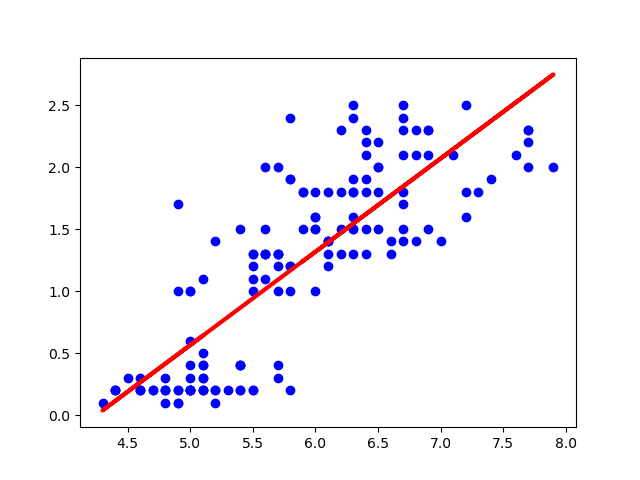

In [8]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [9]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [377]:
def linear_regression(dane, atrybut1, atrybut2):

    X = pd.DataFrame({'X_0' :np.ones((len(dane))), 'X_1':dane.iloc[:, atrybut1]})
    Y = dane.iloc[:, atrybut2]
    
    w = np.dot(np.linalg.pinv(X),Y)
    
    f = (w* X)
    
    sum_f = f['X_1'] + f['X_0']
    
    
    e = np.sum((sum_f -Y)**2)/ len(Y)

    return w, e

In [378]:
result = linear_regression(iris, 0, 3)
print("wartosci parametrów w0, w1 i błędu e wynoszą:")
print(result)

wartosci parametrów w0, w1 i błędu e wynoszą:
(array([-3.200215  ,  0.75291757]), 0.1910150076942736)


In [ ]:
# widzimy, że otrzymane  przez nas wartości parametrów w0 i w1 a także błąd średniokwadratowy e są identyczne
#jak te wyliczone powyżej przez odpowiednie modele

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

In [295]:
w = linear_regression(iris, 0, 2)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 2 wynoszą:")
print(w)

w = linear_regression(iris, 2, 0)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 2 od atrybutu 0 wynoszą:")
print(w)

w = linear_regression(iris, 0, 3)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 3 wynoszą:")
print(w)

w = linear_regression(iris, 3, 0)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 3 od atrybutu 0 wynoszą:")
print(w)

w = linear_regression(iris, 1, 0)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 1 od atrybutu 0 wynoszą:")
print(w)

w = linear_regression(iris, 0, 1)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 1 wynoszą:")
print(w)

w = linear_regression(iris, 1, 2)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 1 od atrybutu 2 wynoszą:")
print(w)

w = linear_regression(iris, 2, 1)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 2 od atrybutu 1 wynoszą:")
print(w)

w = linear_regression(iris, 1, 3)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 1 od atrybutu 3 wynoszą:")
print(w)

w = linear_regression(iris, 3, 1)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 3 od atrybutu 1 wynoszą:")
print(w)

w = linear_regression(iris, 2, 3)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 2 od atrybutu 3 wynoszą:")
print(w)

w = linear_regression(iris, 3, 2)
print(" \n wartosci parametrów w0, w1 i błędu e zależności atrybutu 3 od atrybutu 2 wynoszą:")
print(w)

 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 2 wynoszą:
(array([-7.10144337,  1.85843298]), 0.743061034132124)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 2 od atrybutu 0 wynoszą:
(array([4.30660342, 0.40892228]), 0.16350022510554502)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 3 wynoszą:
(array([-3.200215  ,  0.75291757]), 0.1910150076942736)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 3 od atrybutu 0 wynoszą:
(array([4.77762942, 0.88858025]), 0.22543259797409776)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 1 od atrybutu 0 wynoszą:
(array([ 6.52622255, -0.22336106]), 0.6717073053166401)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 0 od atrybutu 1 wynoszą:
(array([ 3.41894684, -0.0618848 ]), 0.1861043758938136)
 
 wartosci parametrów w0, w1 i błędu e zależności atrybutu 1 od atrybutu 2 wynoszą:
(array([ 9.06315061, -1.73522152]), 2.5272893400281986)
 
 wartosci para

In [296]:
# widzimy, że dla tych samych par ale innej kolejności argumentów otrzymujemy inne wartości błędu
# wynika to z faktu, że inne wartości podajemy jako x i y i dlatego otrzymujemy inne współczynniki
# a co za tym idzie wartości błędów

#wnioski
# - najmniejszy błąd jest dla pary atrybutów 2 i 3 (liczymy od zera) wynosi około 0.04 czyli dla  petal_width i petal_length,
# czyli tam, gdzie jest najsilniejsza korelacja (wynosi 0.96)
# - największy dla par 1 i 2 czyli tam gdzie korelacja jest najmnijesza (wynosi -0.43)


# widzimy więc, że występuje zależność miedzy miarą korelacji a wartością błędów
# zależność ta jest związana z tym, że jeśli mamy dane dobrze skorelowane to układają sie one mniej więcej w jednej
# linii, co pozwala poprowadzić stosunkowo dobrze dopasowaną funkcje liniową
# jeśli zaś dane mamy rozrzucone (a w szczególności jak w naszym przypadku jeden zbiór jest znacząco oddzielony i odległy
# od pozostałych punktów) ciężko jest dobrać i poprowadzić dobrą funkcje liniową
 


# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

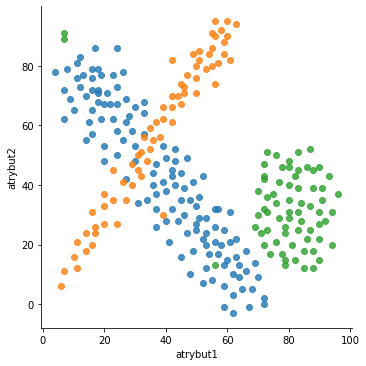

In [297]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [308]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


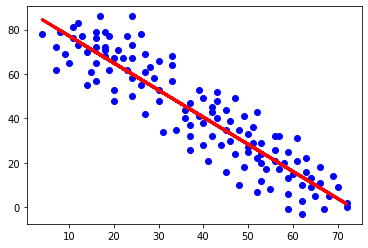

In [309]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

[[56  7  7 84 80 79 82 80 73 70 70 72 73 76 80 83 87 90 93 96 94 92 94 90
  88 85 82 79 79 78 74 72 71 69 72 72 72 77 78 80 83 86 88 88 91 91 87 84
  83 80 80 83 90 90 90 88 85 86 87 83 79 77 76 75 73 73 76 81]]
[[13 91 89 28 29 24 43 40 36 30 38 47 51 50 48 51 52 46 43 37 31 28 20 15
  12 12 15 13 15 17 17 20 24 26 32 42 43 41 46 46 45 46 45 39 39 35 33 34
  39 35 31 31 31 27 22 18 18 22 25 25 26 29 34 37 31 25 21 20]]


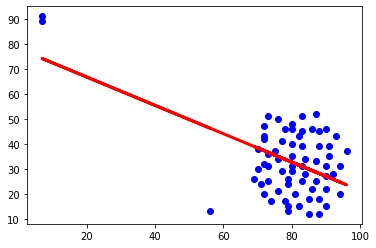

In [300]:
dd = d[d.klasa == 'klasa 1']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


[[61 39 42 56 23 58 56 60 63 60 49 51 55 56 59 59 57 55 55 54 51 50 53 50
  50 46 46 47 45 42 44 45 42 42 39 37 39 35 38 35 36 33 31 32 34 32 29 29
  31 27 23 26 20 20 24 20 17 16 14 17 16 11 14 10 11  7  6]]
[[82 30 82 74 45 92 95 95 94 90 84 85 91 90 88 84 81 80 86 84 82 80 79 76
  71 71 73 77 74 70 70 67 61 66 66 61 62 59 56 52 55 56 50 51 48 43 40 47
  45 35 35 41 37 33 27 27 26 31 24 24 20 21 18 16 12 11  6]]


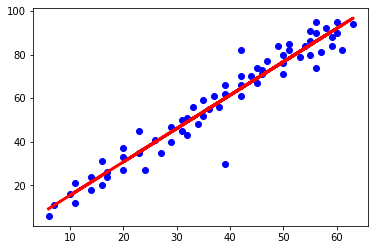

In [304]:
dd = d[d.klasa == 'klasa 2']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()



In [307]:
# wnioski

#dla klasy drugiej można poprowadzić bardzo dobrze dopasowany do punktów model liniowy

# jeśli chodzi o klase 1 to widzimy, 
#że punkty nie skupiają się wzdłuż linii a są skupione na dość rozległym obszarze - ich powierzchnia 
# przypomina koło - ciężko przez taką powierzchnie poprowadzić dobrze dobraną linię
# dodatkowo widzimy, że poprowadzonie w taki sposób funkcji (kierunek funkcji) zostało zdeterminowane 
#głównie przez 3 punkty których współrzędne to (56,13) , (7,91) , (7,89)  
# 3 punkty z spośród 126 stanowią zaledwie niecałe 2,4%
# dodatkowo punkty nie skupiają się wzdłuż linii a są skupione na dość rozległym obszarze - ich powierzchnia 
# przypomina koło - ciężko przez taką powierzcnie poprowadzić dobrze dobraną do punktów funkcje liniową
#możemy więc wnioskować, że poprowadzona funkcja nie jest zbyt dokładna i otrzymamy dość dużą wartość błędów

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [312]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

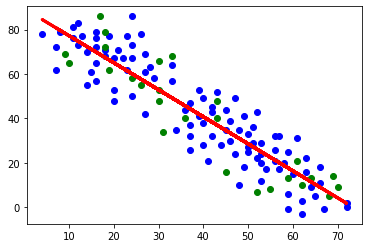

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [313]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na ucżacy i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Dlaczego ?

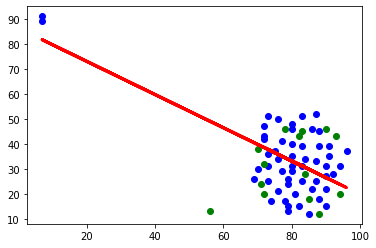

błąd uczenia 128.6347932084175
błąd generalizacji 249.97015889852332


In [358]:
# dla klasy 1 

dd = d[d.klasa == 'klasa 1']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)


In [ ]:
# ustawiłam random_state na None by za każdym razem otrzymywać inny podział
#kod uruchomiłam 5 razy (czyli kilkukrotnie powtarzyłam podział zbioru na uczący i testowy)
# otrzymałam następujące wyniki:
#a
błąd uczenia 147.9044572251131
błąd generalizacji 165.05980258158735
#b
błąd uczenia 142.22202495272973
błąd generalizacji 208.73797664814924
#c
błąd uczenia 168.55117409418395
błąd generalizacji 105.60092164427037
#d
błąd uczenia 122.04435255526707
błąd generalizacji 278.77314973146775
#e
błąd uczenia 144.49858806796607
błąd generalizacji 181.10016465189906

In [368]:
# WNIOSKI DLA KLASY 1


# jak widać błąd uczenia i genralizacji dla klasy 1 jest duży (tak jak przewidywaliśmy powyżej)

# model nie jest zbyt stabilny - 
# błąd uczenia oscyluje za każdym razem mniej więcej przy podobnej wartości jednak jest najmniej stabilny pośród wszytskich klas
# to błąd generalizaji bardzo się zmienia i jest bardzo niestabilny
# do obliczenia błędu generalizacji losujemy mało danych (20%) - a co za tym idziesz w tym przypadku
#(tak rozmieszczonych danych dla klasy 1) jest duża szansa że wylosujemy same punkty znajdujące się blisko linii (mniejszy błąd)
#lub same punkty znajdujące się daleko od linii (większy błąd)
# dla klasy 1 błąd generalizacji jest najmniej stabilny ze wszystkich klas jakie mamy

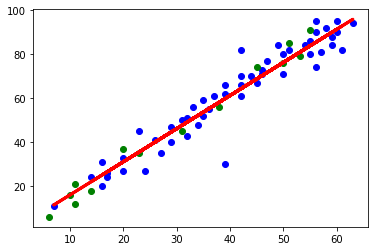

błąd uczenia 46.51085414038224
błąd generalizacji 18.247800202835425


In [366]:
# dla klasy 2 

dd = d[d.klasa == 'klasa 2']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)



In [ ]:
# kod uruchomiłam 5 razy (czyli kilkukrotnie powtarzyłam podział zbioru na uczący i testowy)
# otrzymałam następujące wyniki:
#a
błąd uczenia 39.93835480450884
błąd generalizacji 45.95765863132922
#b
błąd uczenia 42.4886191869781
błąd generalizacji 36.34153583934718
#c
błąd uczenia 38.903256486719165
błąd generalizacji 52.176871912694025
#d
błąd uczenia 40.63932141487768
błąd generalizacji 40.31903805216208
#e
błąd uczenia 46.51085414038224
błąd generalizacji 18.2478002028354254

In [367]:
# WNIOSKI DLA KLASY 2

# błąd uczenia jest dość stabilny
# jeśli chodzi o błąd genralizaji to jest bardziej stabilny niż dla klasy 1, wynika to z dość dobrze dobranej 
# do danych funkcji liniowej, zdarza się (jak w podpunkcie e) że wylosują nam się w większości dane znajdujace się blisko linii
# lub przeciwnie same daleko od linii
# jednak w większości przypadków wartość błędu genralziacji jest dość stabilna

# wartość błędu generalizacji i uczenia są dla klasy 2 mniejsze niż dla pozostałych klas
# co potwierdza wcześniejsze wnioski, że dla tych danych możemy najlepiej dopasować funkcje liniową

# dla klasy 2 mamy najbardziej stabilny model ze wszystkich

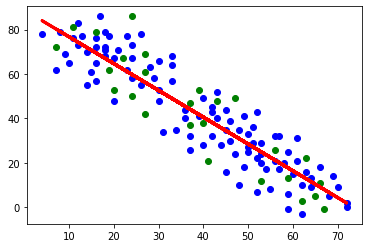

błąd uczenia 96.32082254136742
błąd generalizacji 115.31427917608943


In [357]:
# dla klasy 3

dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)



In [ ]:
# kod uruchomiłam 5 razy (czyli kilkukrotnie powtarzyłam podział zbioru na uczący i testowy)
# otrzymałam następujące wyniki:
#a)
błąd uczenia 86.31148666082659
błąd generalizacji 154.15590416136234
#b)
błąd uczenia 102.62901789711617
błąd generalizacji 91.7691506004068
#c)
błąd uczenia 92.28530289180158
błąd generalizacji 132.2083964431823
#d) 
błąd uczenia 109.86549911795944
błąd generalizacji 64.80240674020048
#e)
błąd uczenia 101.46601887750823
błąd generalizacji 96.48985784927534

In [369]:
# WNIOSKI DLA KLASY 3
# błąd uczenia jest dość stabilny, wynika to z faktu że na całej przestrzeni dane są podobnie rozmieszczone
# (wzdłuż całej linii mamy kilka punktów bliższych i dalszych, nie ma skupisk w postaci np. samych oddalonych punktów w którymś momencie)

# błąd genralziacji nie jest zbyt stabilny, losujemy 20% danych więc jest prawdopodobieństwo że wylosujemy
# w większości dane oddalone lub bliskie linii, jest więc mniej stabilne niż dla klasy 2 ale bardziej stabilny niż 
# dla klasy 1

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trensu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


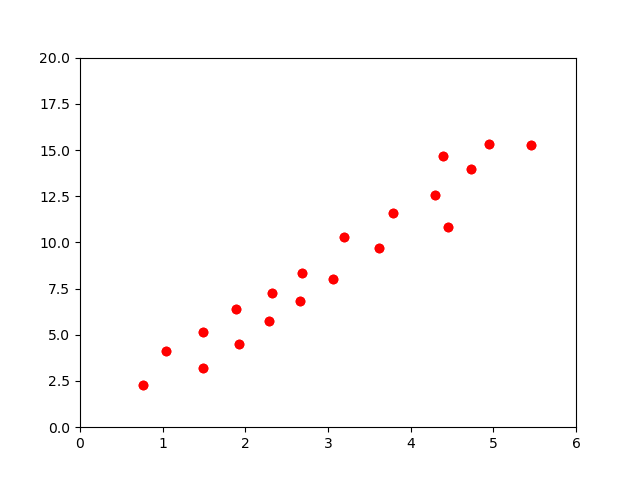

In [173]:
ile_probek = 20
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [372]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes
None


,x,y
0,0.756492,2.307594
1,1.034718,4.147421
2,1.482299,3.227507
3,1.482299,5.175559
4,1.917782,4.526209
5,1.881492,6.420148
6,2.280686,5.770797
7,2.316976,7.285949
8,2.655686,6.853048
9,2.679879,8.368200


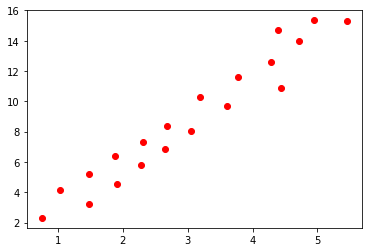

In [373]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')

> **Zadanie** Napisz funkcję, która stworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [475]:
def create_x_matrix(data, grade):

    i = 0
    X = pd.DataFrame({"0" :np.ones((len(data)))})

    while(i<=grade):
        X.loc[:, str(i)] = list(data**i)
        i = i +1
    
    return X
  


> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [477]:
def polinomian_regression(grade):
   
    X = create_x_matrix(df.x,grade)
    Y = df.y
    
    w = np.dot(np.linalg.pinv(X),Y)  

    f = (w * X)

    i = 0
    j =grade
    
    f_sum =0
    
    # błąd średniokwadratowy
    while(i < j):
        f_sum = f_sum + f[str(i)]
        i = i +1
    
    e = np.sum((f_sum -Y)**2)/ len(Y)
    print(e)

    return w

In [478]:
# wynik dla regresji liniowej
print("wynik dla regresji liniowej")
result = polinomian_regression(1)
print(result)

# wynik dla regresji wielomianowej 3 stopnia

print("\nwynik dla regresji wielomianowej tzreciego stopnia")
result = polinomian_regression(3)
print(result)


wynik dla regresji liniowej
92.18389161917565
[0.11255623 2.88788818]

wynik dla regresji wielomianowej tzreciego stopnia
23.718087023366216
[ 1.91722634  0.69432751  0.74368528 -0.07495888]


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


In [485]:
# korzystam z mojej funkcji:

def polinomian_regression_2(grade):
   
    X = create_x_matrix(df.x,grade)
    Y = df.y
    
    w = np.dot(np.linalg.pinv(X),Y)  

    f = (w * X)

    i = 0
    j =grade
    
    f_sum =0
    
    # błąd średniokwadratowy
    while(i < j):
        f_sum = f_sum + f[str(i)]
        i = i +1
    
    e = np.sum((f_sum -Y)**2)/ len(Y)
    #print(e)

    return f_sum

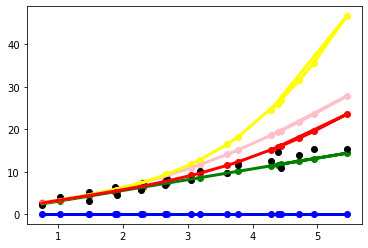

In [486]:

plt.scatter(df.x, polinomian_regression_2(1), color='blue')
plt.plot(df.x, polinomian_regression_2(1), color='blue', linewidth=3)
plt.scatter(df.x, polinomian_regression_2(2), color='green')
plt.plot(df.x, polinomian_regression_2(2), color='green', linewidth=3)
plt.scatter(df.x, polinomian_regression_2(3), color='pink')
plt.plot(df.x, polinomian_regression_2(3), color='pink', linewidth=3)
plt.scatter(df.x, polinomian_regression_2(4), color='yellow')
plt.plot(df.x, polinomian_regression_2(4), color='yellow', linewidth=3)
plt.scatter(df.x, polinomian_regression_2(5), color='red')
plt.plot(df.x, polinomian_regression_2(5), color='red', linewidth=3)

# wyświtlam także sam zbiór (na czarno)
plt.scatter(df.x, df.y, color='black')

plt.show()

94.15855080398097
92.18389161917565
1.5809490284075458
23.718087023366216
118.05342756640539
7.420709953198271
223886.18616464487
288.7542077250024
101772879.9184443
182245564.39489162
48465959097.37073
1228763520428.183
495917188501517.4
821881687898993.8
1267992749333815.8
1854821963325245.5
2452889430992343.0
2224860358661783.2
194842177038029.47
2.954387035798178e+16
3.5976584949164024e+16
1.57072090609555e+18
3.28950866184409e+18
3.074270875014196e+18
1.0213503996120324e+19
3.292822986989239e+19
1.1026934218998281e+20
1.4017305902840377e+19
3.4990895881608802e+19
8.196527000200107e+19


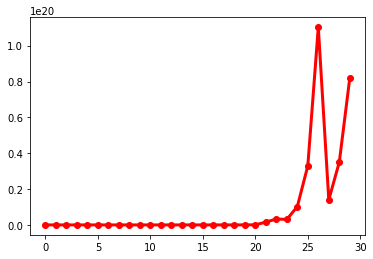

In [415]:
err = [None] *30
err_y = [None] *30
i = 0
while(i< 30):
    err_y[i] = i 
    err[i] = np.sum(((polinomian_regression_2(i)) -df.y)**2)/ len(df.y)
    i = i +1

plt.scatter(err_y,err, color='red')
plt.plot(err_y,err, color='red', linewidth=3)
plt.show()



In [ ]:
# wartość funkcji (zasadniczo) rośnie wraz ze wzrostem argumentu, jednak są wyjątki dla kilku przypadków gdzie 
# funkcja osiąga mniejszą wartość, jednak potem znów rośnie

In [ ]:
# wyświetlę jeszcze ten sam wykres dla mniejszego zakresu argumentów - od 1 do 5 tak jak jest podane w zadaniu,
# by dokładniej zbadać nasze dane dla tych wartości stopnia wielomianu:

92.18389161917565
1.5809490284075458
23.718087023366216
118.05342756640539
7.420709953198271


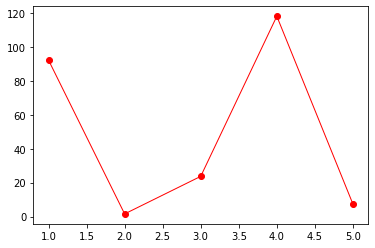

In [418]:
err = [None] * 5
err_y = [None] *5
i = 0
while(i < 5):
    err_y[i] = i +1
    err[i] = np.sum(((polinomian_regression_2(i+1)) -df.y)**2)/ len(df.y)
    i = i +1

plt.scatter(err_y,err, color='red')
plt.plot(err_y,err, color='red', linewidth=1)
plt.show()



In [422]:
#WNIOSKI:
# spośród tych 5 stopni wielomianu dla danych na których pracuję najmniejszy błąd średniokwadratowy
# otrzymuję dla regresji wielomianowej dla stopnia 2


> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [ ]:
# tą funkcją jest funkcja "polyfit"
# poniżej przykład działania dla regresji liniowej i regresji wielomianowej 3 stopnia

In [388]:
print("przykład dla regresji liniowej")
print(np.polyfit(df.x,df.y,1))

przykład dla regresji liniowej
[2.88788818 0.11255623]


In [389]:
print("przykład dla regresji wielomianowej trzeciego stopnia")
print(np.polyfit(df.x,df.y,3))

przykład dla regresji wielomianowej trzeciego stopnia
[-0.07495888  0.74368528  0.69432751  1.91722634]


In [390]:
# widzimy, że funkcja daje nam takie same wyniki jak stworzona przeze mnie powyżej funkcja
# (funkcja polyfit zwraca wartości współczynników od największej potęgi do najmniejszej w przeciwieństwie do mojej funkcji)

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

In [481]:
# muszę przerobić moją funkcje by przyjmowała dodatkowo jako argument zbiór X i zbiór Y

# korzystam z mojej funkcji:

def polinomian_regression_3(X_data,Y_data, grade):
   
    X = create_x_matrix(X_data,grade)
    Y = Y_data
    
    w = np.dot(np.linalg.pinv(X),Y)  

    f = (w * X)

    i = 0
    j =grade
    
    f_sum =0
    
    # błąd średniokwadratowy
    while(i < j):
        f_sum = f_sum + f[str(i)]
        i = i +1
    
    e = np.sum((f_sum -Y)**2)/ len(Y)
    print(e)

    return f_sum

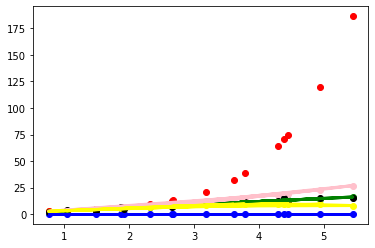

In [440]:
# ad 1
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.2, random_state=1)



plt.scatter(x_ucz, polinomian_regression_3(x_ucz,y_ucz,1), color='blue')
plt.plot(x_ucz, polinomian_regression_3(x_ucz,y_ucz,1), color='blue', linewidth=3)
plt.scatter(x_ucz, polinomian_regression_3(x_ucz,y_ucz,2), color='green')
plt.plot(x_ucz, polinomian_regression_3(x_ucz,y_ucz,2), color='green', linewidth=3)
plt.scatter(x_ucz, polinomian_regression_3(x_ucz,y_ucz,3), color='pink')
plt.plot(x_ucz, polinomian_regression_3(x_ucz,y_ucz,3), color='pink', linewidth=3)
plt.scatter(x_ucz, polinomian_regression_3(x_ucz,y_ucz,4), color='yellow')
plt.plot(x_ucz, polinomian_regression_3(x_ucz,y_ucz,4), color='yellow', linewidth=3)
plt.scatter(x_ucz, polinomian_regression_3(x_ucz,y_ucz,5), color='red')


# wyświtlam także sam zbiór
plt.scatter(x_ucz, y_ucz, color='black')

plt.show()



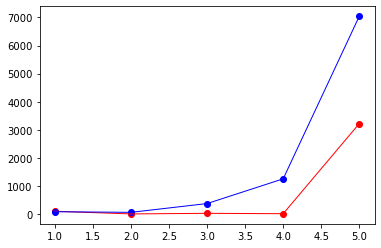

[79.56446203999593,
 57.28627395593775,
 370.0640843545019,
 1251.2832332696753,
 7043.558570404909]

In [451]:
# ad 2

err_ucz = [None] * 5
err_test = [None] * 5
err_y = [None] *5
i = 0

while(i < 5):
   
    err_y[i] = i + 1
    
    err_ucz[i] = metrics.mean_squared_error(y_ucz, polinomian_regression_3(x_ucz,y_ucz,(i+1)))
    err_test[i] = metrics.mean_squared_error(y_test, polinomian_regression_3(x_test,y_test,(i+1)))
    i = i + 1

plt.scatter(err_y,err_ucz, color='red')
plt.plot(err_y,err_ucz, color='red', linewidth=1)


plt.scatter(err_y,err_test, color='blue')
plt.plot(err_y,err_test, color='blue', linewidth=1)

plt.show()

#wypisujemy błąd generalizacji
err_test

In [452]:
#ad 3
# w wybraniu najlepszego stopnia wielomianu dla naszych danych patrzymy głównie na błąd generalizacji,
# zależy nam na jak najlepszej zdolności generalizaji - czyli chcemy otrzymać jak najmniejszy błąd genralizacji
#(kolor niebieski na moim wykresie)

# spośród tych 5 stopni wielomianu najmniejszy błąd generalziacji dla stopnia 2
# czyli wielomian stopnia 2 jest dla moich danych najlepszym wyborem 

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

In [484]:
#1
# tak, błąd uczenia wyniósłby zero jeśli punkty danych, jakie posiadamy byłyby idealnymi punktami pewnej funkcji
# (nie mogą to być wartości przybliżone, muszą być dokładnie te punkty) - czyli wartość punktów naszych danych odpowiadałaby wartości funkcji regresji we wszystkich przypadkach

#2
# nie, nam zależy, żeby to błąd generalizacji był jak najmniejszy, nie błąd uczenia
# gdyby błąd uczenia był skrajnie mały, bliski 0 mielibyśmy do czynienia z przeuczeniem 

#3
# jeśli rówanie nie jest sprzeczne to zawsze można znaleźć przybliżone (lub w niektórych przypadkach dokładne)
#rozwiązanie zgodne z pewnymi założeniami

#4
# w miarę zwiększania stopnia wielomianu możemy zaobserowować, że wartości współczynników dla wyższych potęg
# są coraz mniejsze, a wartość błędu średniokwadratowego powyżej pewnego stopnia z reguły rośnie


In [ ]:
#koniec